In [16]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals
import matplotlib.pyplot as plt
from time import time
import sys
from abel.direct import direct_transform
from abel.tools.analytical import GaussianAnalytical
from xbeamfit import fitting
from xbeamfit import distributions 
import json
import numpy as np
import scipy as sp
import pandas as pd
import sys
import xbeamfit as xb 
from scipy import interpolate
from numpy import trapz
import scipy.integrate as integrate
from scipy import special
from scipy.stats import norm

from scipy.stats import chi
from scipy.stats import chi2


Let us consider the normalized phase space $x-p_x$ and a 2D matched density distribution $\rho$.
For the linear case, a matched distribution is rotation invariant, that is, in the $J,\mu$ variables, we can write $\rho(r=\sqrt{2 J},\phi)=\rho(r)$. 
Here we use the $r$-notation instead of the $J$-notation to stay compatible with the Abel transform's standard form.
We consider for $\rho$ the following normalization:
\begin{equation}
\int_0^\infty  \int_0^{2\pi} \rho( r ) \ r\ dr\ d\phi = 2\pi \int_0^\infty  \rho( r ) \ r\ dr =1.
\end{equation}
By defining a linear radial density $\rho_r(r)=2\pi \rho(r) \ r$, we have
\begin{equation}
\int_0^\infty \rho_r( r ) dr= 1
\end{equation}
Where

the $\rho(r)$ is the 2D density to be Abel-transformed (see Example 3).
the $\rho_r(r)$ is the 1D density to be used in the numerical experiment we will perform (see Example 2). 
In fact is more convenient for our purpose to populate a random vector starting from a 1D density than a 2D one.

Taken from: https://gitlab.cern.ch/sterbini/bblumi/blob/master/docs/how-tos/abel_transform/Abel_Transform.md

## Example 1

Showing that $\rho_r(r)$ distributes like a Chi-distribution


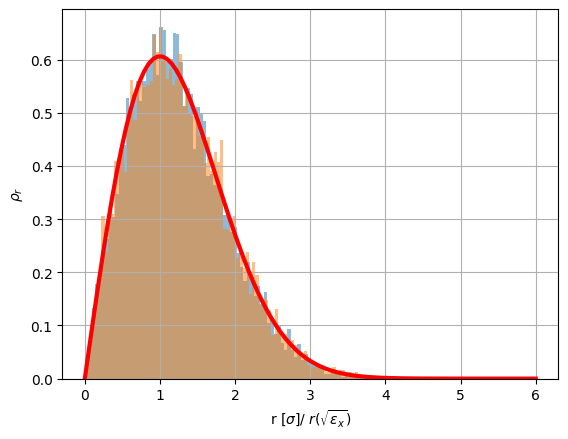

In [17]:

def gauss(x,sigma):
    return 1/np.sqrt(2*np.pi)/sigma*np.exp(-(x)**2/2/sigma**2)


N=10000
x=np.random.randn(N)
px=np.random.randn(N)

plt.hist(np.sqrt(x**2+px**2),100,density=True,alpha=.5); # Chi-distribution of type 2 or Rayleigh-distribution

rho_r = chi.rvs(2, size=N)
plt.hist(rho_r,100,density=True,alpha=.5)

r=np.linspace(0,6,100)
plt.plot(r, chi.pdf(r,2),'r',lw=3)
plt.grid(True)
plt.xlabel('r [$\sigma$]/ $r(\sqrt{\epsilon_{x}})$')
plt.ylabel('$\\rho_r$ ');


# https://gitlab.cern.ch/sterbini/bblumi/blob/master/docs/how-tos/abel_transform/Abel_Transform.md

## Example 2
Showing that $\rho_r(J)$ distributes like a chi2-distribution

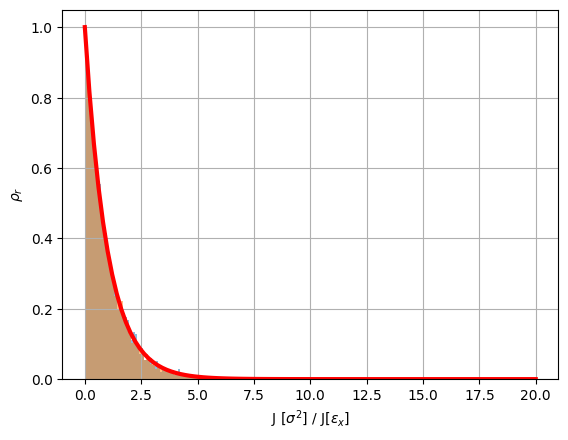

In [19]:

N=10000
x=np.random.randn(N)
px=np.random.randn(N)

plt.hist((x**2+px**2)/2,100,density=True,alpha=.5); # chi2-squared distribution of type 2

rho_r = chi2.rvs(2, size=N)/2
plt.hist(rho_r,100,density=True,alpha=.5)

J=np.linspace(0,20,100)
plt.plot(J, 2*chi2.pdf(J*2,2),'r',lw=3)
plt.grid(True)
plt.xlabel('J [$\sigma^2$] / J[$\epsilon_{x}]$')
plt.ylabel('$\\rho_r$');


# https://gitlab.cern.ch/sterbini/bblumi/blob/master/docs/how-tos/abel_transform/Abel_Transform.md

## Example 3
Starting from two 1D distributions

$\rho_r$ (Rayleigh-distributed) and
$\rho_{\phi}$(uniform distributed in [0-2$\pi$])

verify that $x$ is normal distributed.

Text(0, 0.5, 'pdf')

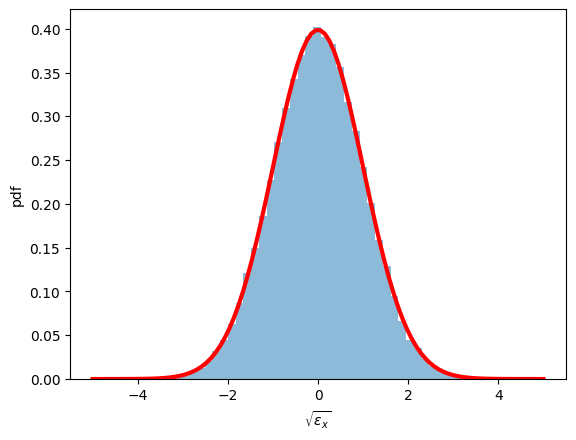

In [20]:
N=100000
rho_r = chi.rvs(2, size=N)
rho_phi=np.random.rand(N)*2*np.pi
x=rho_r*np.cos(rho_phi)
plt.hist(x,50,density=True,alpha=.5 );
x=np.linspace(-5,5,100)
plt.plot(x, gauss(x,1),'r',lw=3)
plt.xlabel('$\sqrt{\epsilon_{x}}$')
plt.ylabel('pdf')
# https://gitlab.cern.ch/sterbini/bblumi/blob/master/docs/how-tos/abel_transform/Abel_Transform.md
# the integral here is finite. 

## Example 4

Compute the $\rho$ from a $\chi^2 = 2 $ distribution, and then find the Abel transform 


## Workflow from a profile distribution to $\rho_r(r)$
$ABEL^{-1}[\rho(x)] = \rho(r)$ 

$\rho_r(r) = 2\pi r\rho(r)$

Falling back to a pure Python backend...


Text(0, 0.5, 'pdf')

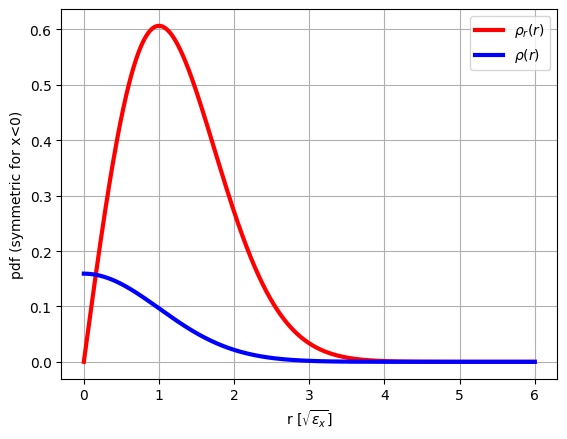

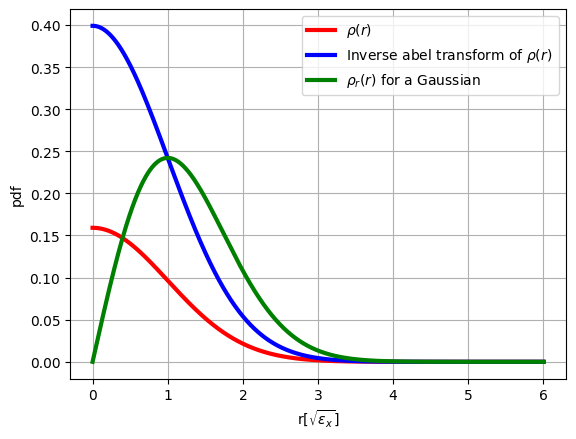

In [21]:
r=np.linspace(0.00001,6,10000)
rho_r=chi.pdf(r,2)

plt.plot(r, rho_r,'r',lw=3,label='$\\rho_r(r)$')

# find rho, basically pdf and is Gaussian ao
rho=rho_r/2/np.pi/r

plt.plot(r,rho,'b',lw=3,label='$\\rho(r)$')
plt.grid(True)
plt.ylabel('pdf (symmetric for x<0)')
plt.xlabel('r [$\sqrt{\epsilon_x}$]')
plt.legend(loc='best')


plt.figure()

r=np.linspace(0.00001,6,10000)

abel_chi = direct_transform(rho, dr=np.diff(r)[0], direction="Forward", correction=True)

plt.plot(r,rho, 'r',lw=3, label='$\\rho(r)$')
plt.plot(r,abel_chi, 'b',lw=3,label='Inverse abel transform of $\\rho(r)$ ')
plt.plot(r,r*abel_chi, 'g',lw=3, label='$\\rho_r(r) \alpha r*e^{\\frac{-r^2}{2}}$ for a Gaussian')

plt.legend()
plt.grid()
plt.xlabel('r$[\sqrt{\epsilon_x}]$')
plt.ylabel('pdf')


# https://gitlab.cern.ch/sterbini/bblumi/blob/master/docs/how-tos/abel_transform/Abel_Transform.md


# Example 5 

For a Gaussian and a q-Gaussian compare how they are distributed for $\rho(r)$ and $\rho(J_x)$



1 1.3


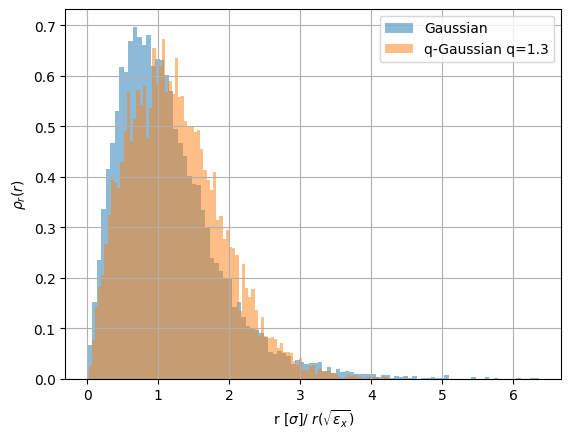

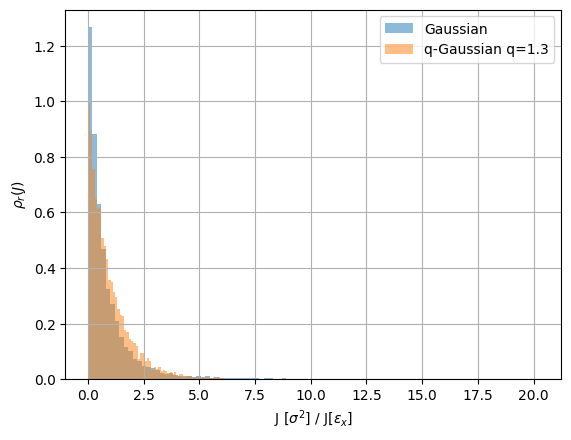

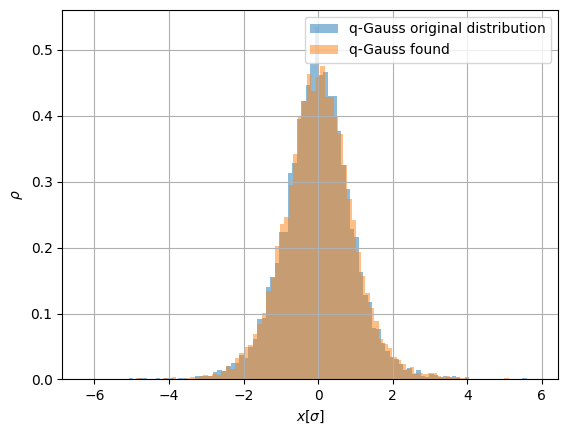

In [22]:
x_input = np.linspace(-8,8,20000)

q0 = 1.3
#b0 =  1/(5-3*q0)
b0 = 1
#sigma = 1/((b0)*(5-3*q0))
A0 = 1
print(b0, q0, )

pq = xb.distributions.qGauss(x_input, mu=0, A=A0, b=b0, q=q0)/np.sum(xb.distributions.qGauss(x_input, mu=0, A=A0, b=b0, q=q0))
pq = np.nan_to_num(pq)

qx = np.random.choice(a=x_input,p=pq,size=10000)
qpx = np.random.choice(a=x_input,p=pq,size=10000)

x = np.random.choice(a=x_input,p=xb.distributions.Gaussian(x_input, mu=0, A=1, sig=1, )/np.sum(xb.distributions.Gaussian(x_input, mu=0, A=1, sig=1, )), size=10000)
px = np.random.choice(a=x_input,p=xb.distributions.Gaussian(x_input, mu=0, A=1, sig=1, )/np.sum(xb.distributions.Gaussian(x_input, mu=0, A=1, sig=1, )), size=10000)

rho_r_q = np.sqrt(qx**2+qpx**2)
rho_r = np.sqrt(x**2+px**2)

plt.hist(np.sqrt(qx**2+qpx**2),100,density=True,alpha=.5,label='q-Gaussian q='+str(q0)');
plt.hist(np.sqrt(x**2+px**2),100,density=True,alpha=.5,label='Gaussian'); 

plt.legend()
plt.grid()
plt.xlabel('r [$\sigma$]/ $r(\sqrt{\epsilon_{x}})$')
plt.ylabel('$\\rho_r(r)$')




plt.figure()
plt.hist((qx**2+qpx**2)/2,100,density=True,alpha=.5, label='Gaussian'); 
plt.hist((x**2+px**2)/2,100,density=True,alpha=.5, label='q-Gaussian q=1.3'); 
plt.legend()
plt.grid()
plt.xlabel('J [$\sigma^2$] / J[$\epsilon_{x}]$')
plt.ylabel('$\\rho_r(J)$')


plt.figure()
N = 10000
rho_phi=np.random.rand(N)*2*np.pi
xq_refound = rho_r_q*np.cos(rho_phi)
plt.hist(qx,100,density=True,alpha=.5 ,label='q-Gauss original distribution');
plt.hist(xq_refound,100,density=True,alpha=.5 , label='q-Gauss found');
plt.legend()
plt.ylabel('$\\rho$')
plt.xlabel('$x[\sigma]$')
plt.grid()

### Example 6 

Find $\rho_r(r)$ for a q-Gaussian using the Inverse Abel transform

In [23]:
# perform the abel transform and compare it to the numerical calculation 
r=np.linspace(0.0000,8,10000)

rho_x_q = xb.distributions.qGauss(x_input, mu=0, A=A0, b=b0, q=q0)

abel_qgauss = direct_transform(rho_x_q[10000:20000], dr=np.diff(r)[0], direction="inverse", correction=True)

rho_r_r = np.pi*2*r*abel_qgauss


Falling back to a pure Python backend...


Text(0.5, 1.0, 'Q-Gaussian')

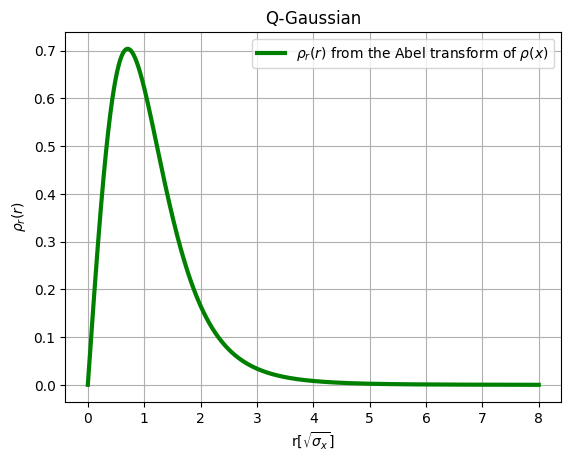

In [24]:
plt.plot(r,rho_r_r, 'g',lw=3, label='$\\rho_r(r)$ from the Abel transform of $\\rho(x)$')

plt.legend()
plt.grid()
plt.xlabel('r$[\sqrt{\sigma_x}]$')
plt.ylabel('$\\rho_r(r)$')
plt.title('Q-Gaussian')

### Example 7 
Find $\rho_r(J)$ using the Abel transform

In [ ]:
# from Example 6



# Example 6
Reconstructing the angular distribution in normalised phase space of a q-Gaussian fitted horizontal profile 

Falling back to a pure Python backend...


Text(0, 0.5, 'pdf')

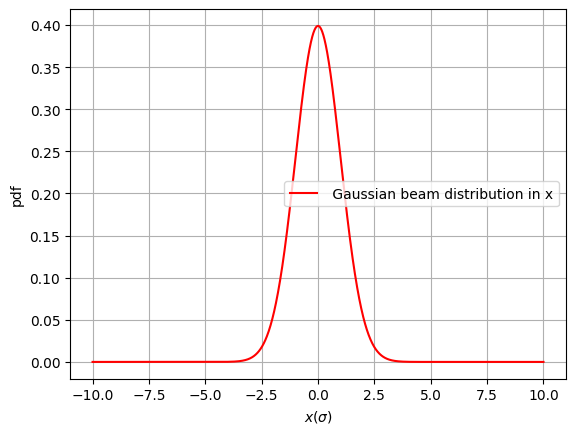

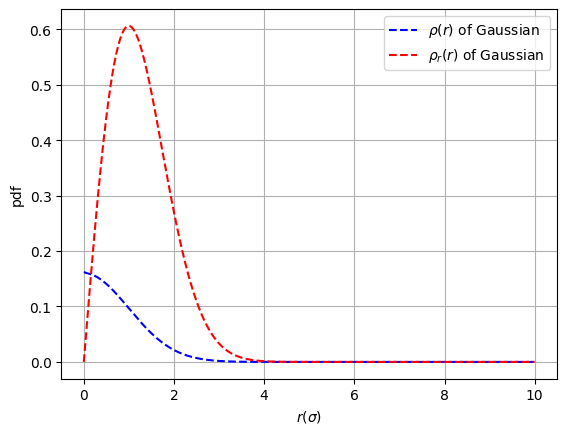

In [8]:
x=np.linspace(-10,10,2000)

r = np.linspace(0,10,1000)
# rho(r) is chi distributed 
# rho(J) is chi^2 distributed 

gaussd= xb.distributions.Gaussian(x, mu=0, A=1, sig=1)

plt.plot(x, gaussd, label=' Gaussian beam distribution in x', c='r')
plt.grid()
plt.legend()
plt.xlabel('$x(\sigma)$')
plt.ylabel('pdf')

plt.figure()
abel_gauss =direct_transform(gaussd[1000:2000], dr=np.diff(r)[0], direction="inverse", correction=True )
rho_r = abel_gauss*np.pi*2*r
plt.plot(r, abel_gauss,label='$\\rho(r)$ of Gaussian', c='b',linestyle='--')
plt.plot(r,rho_r,label='$\\rho_r(r)$ of Gaussian', c='r',linestyle='--')

plt.grid()
plt.legend()
plt.xlabel('$r(\\sigma)$')
plt.ylabel('pdf')
# make a Gaussian distribution for x 

# USING INTERPOLATE YOU CAN MAKE A FUNCTION FOR RHO 





Falling back to a pure Python backend...


Text(0, 0.5, 'pdf')

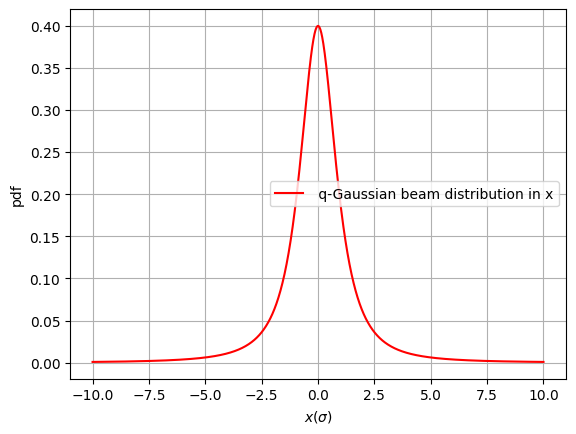

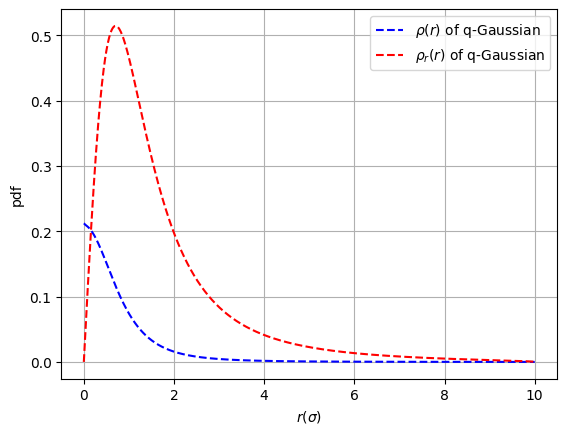

In [97]:
from xsuite_functions import footprint as fp
x = np.linspace(-10,10,2000)
r = np.linspace(0,10,1000)

qgauss= xb.distributions.qGauss(x, 0, 1.7, 1, 1)

plt.plot(x, qgauss, label=' q-Gaussian beam distribution in x', c='r')
plt.grid()
plt.legend()
plt.xlabel('$x(\sigma)$')
plt.ylabel('pdf')

plt.figure()
abel_qgauss =direct_transform(qgauss[1000:2000], dr=np.diff(r)[0], direction="inverse", correction=True )
rho_r = abel_qgauss*np.pi*2*r
plt.plot(r, abel_qgauss,label='$\\rho(r)$ of q-Gaussian', c='b',linestyle='--')
plt.plot(r,rho_r,label='$\\rho_r(r)$ of q-Gaussian', c='r',linestyle='--')

plt.grid()
plt.legend()
plt.xlabel('$r(\\sigma)$')
plt.ylabel('pdf')


In [148]:
# create radial distribution of particles and a dataframe with the density from the q-Gauss abel transform 

norm_coordinates = fp.generate_coordGrid(r,
                                    np.linspace(0.0*2*np.pi,1*2*np.pi,100),labels = ['r_n','theta_n'])
norm_coordinates.insert(0,'x_n',coordinates['r_n']*np.cos(coordinates['theta_n']))
norm_coordinates.insert(1,'y_n',coordinates['r_n']*np.sin(coordinates['theta_n']))
norm_coordinates.insert(2,'dens', 0)

df_coords =  norm_coordinates[['r_n','theta_n','dens']].copy()
df_coords = df_coords.pivot('r_n', 'theta_n','dens' )

for i in range(100):
    col = df_coords.keys()[i]
    df_coords.loc[:,col] = abel_qgauss 

/tmp/ipykernel_1435252/1442089395.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_coords = df_coords.pivot('r_n', 'theta_n','dens' )


/tmp/ipykernel_1435252/2546610160.py:7: RuntimeWarning: divide by zero encountered in log
  pcm=ax.pcolormesh(theta, r, np.log(data),cmap='jet', )
/tmp/ipykernel_1435252/2546610160.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  pcm=ax.pcolormesh(theta, r, np.log(data),cmap='jet', )


Text(0.5, 1.0, 'q-Gaussian profile in x, transformed to density in x-px with the Abel transform')

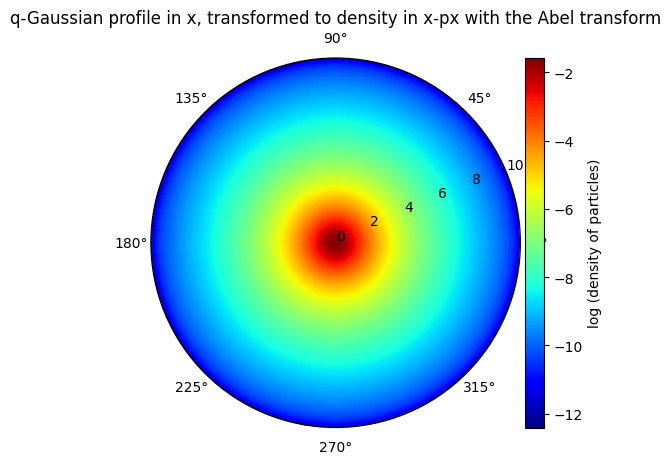

In [149]:
theta = df_coords.columns.values
r = df_coords.index.values
data =  df_coords.values

fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
pcm=ax.pcolormesh(theta, r, np.log(data),cmap='jet', )
cbar=plt.colorbar(pcm,pad=0.01, label='log (density of particles)')
ax.set_title('q-Gaussian profile in x, transformed to density in x-px with the Abel transform')

/tmp/ipykernel_1435252/1275446761.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_coords = df_coords.pivot('r_n', 'theta_n','dens' )
/tmp/ipykernel_1435252/1275446761.py:20: RuntimeWarning: divide by zero encountered in log
  pcm=ax.pcolormesh(theta, r, np.log(data),cmap='jet', )
/tmp/ipykernel_1435252/1275446761.py:20: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  pcm=ax.pcolormesh(theta, r, np.log(data),cmap='jet', )


Text(0.5, 1.0, 'Gaussian profile in x, transformed to density in x-px with the Abel transform')

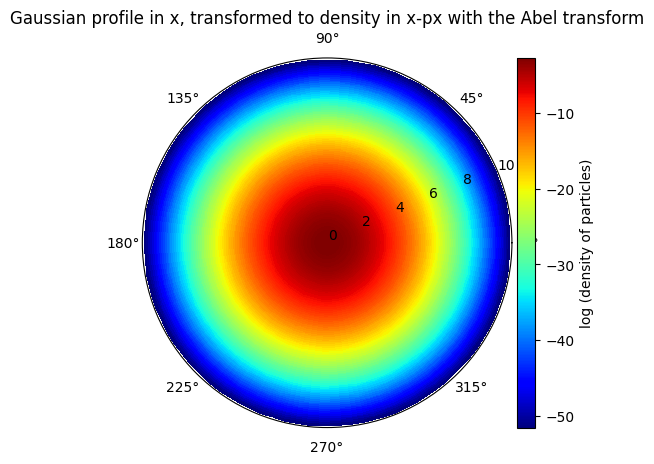

In [134]:
norm_coordinates = fp.generate_coordGrid(r,
                                    np.linspace(0.0*2*np.pi,1*2*np.pi,100),labels = ['r_n','theta_n'])
norm_coordinates.insert(0,'x_n',coordinates['r_n']*np.cos(coordinates['theta_n']))
norm_coordinates.insert(1,'y_n',coordinates['r_n']*np.sin(coordinates['theta_n']))
norm_coordinates.insert(2,'dens', 0)

df_coords =  norm_coordinates[['r_n','theta_n','dens']].copy()
df_coords = df_coords.pivot('r_n', 'theta_n','dens' )

for i in range(100):
    col = df_coords.keys()[i]
    df_coords.loc[:,col] = abel_chi
    
theta = df_coords.columns.values
r = df_coords.index.values
data =  df_coords.values

fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
pcm=ax.pcolormesh(theta, r, np.log(data),cmap='jet', )
cbar=plt.colorbar(pcm,pad=0.01, label='log (density of particles)')
ax.set_title('Gaussian profile in x, transformed to density in x-px with the Abel transform') # some normalisation questions here 